---
# <center> Лабораторна робота №7 </center>
## **Тема. Структури даних дерево, купа, геш-таблиця**
## **Мета:** засвоїти основні функції та алгоритми роботи з деревами та купою засобами Python
### _Викoнав Данііл Танасієнко 11.12.24_
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, що надано на самостійну роботу.
### <center> Завдання для самостійної роботи </center>

#### **1)** Створити бінарне дерево

In [8]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        """Вставляє новий елемент у бінарне дерево"""
        if not self.root:
            self.root = Node(value)
        else:
            self._insert_recursively(self.root, value)

    def _insert_recursively(self, current_node, value):
        if value < current_node.value:
            if current_node.left:
                self._insert_recursively(current_node.left, value)
            else:
                current_node.left = Node(value)
        elif value > current_node.value:
            if current_node.right:
                self._insert_recursively(current_node.right, value)
            else:
                current_node.right = Node(value)

    def inorder_traversal(self):
        """Обхід дерева у порядку in-order"""
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

    def _inorder_traversal_recursive(self, node, result):
        if node:
            self._inorder_traversal_recursive(node.left, result)
            result.append(node.value)
            self._inorder_traversal_recursive(node.right, result)

    def search(self, value):
        """Шукає елемент у дереві"""
        return self._search_recursively(self.root, value)

    def _search_recursively(self, current_node, value):
        if not current_node:
            return False
        if value == current_node.value:
            return True
        elif value < current_node.value:
            return self._search_recursively(current_node.left, value)
        else:
            return self._search_recursively(current_node.right, value)

# Створення дерева
if __name__ == "__main__":
    tree = BinaryTree()
    
    # Додавання елементів
    elements = [10, 5, 10, 15, 2, 19, 22, 51, 24, 31, 42, 27]
    for el in elements:
        tree.insert(el)

    # Обхід дерева
    print("Обхід за порядком:", tree.inorder_traversal())

    # Пошук елементів
    search_values = [5, 20, 10, 52, 42, 100, 383235325]
    for value in search_values:
        print(f"Чи є {value} у дереві?", tree.search(value))


Обхід за порядком: [2, 5, 10, 15, 19, 22, 24, 27, 31, 42, 51]
Чи є 5 у дереві? True
Чи є 20 у дереві? False
Чи є 10 у дереві? True
Чи є 52 у дереві? False
Чи є 42 у дереві? True
Чи є 100 у дереві? False
Чи є 383235325 у дереві? False


#### **2)**  Написати процедуру видалення заданої гілки дерева

In [9]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        """Вставляє новий елемент у бінарне дерево"""
        if not self.root:
            self.root = Node(value)
        else:
            self._insert_recursively(self.root, value)

    def _insert_recursively(self, current_node, value):
        if value < current_node.value:
            if current_node.left:
                self._insert_recursively(current_node.left, value)
            else:
                current_node.left = Node(value)
        elif value > current_node.value:
            if current_node.right:
                self._insert_recursively(current_node.right, value)
            else:
                current_node.right = Node(value)

    def inorder_traversal(self):
        """Обхід дерева у порядку in-order"""
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

    def _inorder_traversal_recursive(self, node, result):
        if node:
            self._inorder_traversal_recursive(node.left, result)
            result.append(node.value)
            self._inorder_traversal_recursive(node.right, result)

    def search(self, value):
        """Шукає елемент у дереві"""
        return self._search_recursively(self.root, value)

    def _search_recursively(self, current_node, value):
        if not current_node:
            return False
        if value == current_node.value:
            return True
        elif value < current_node.value:
            return self._search_recursively(current_node.left, value)
        else:
            return self._search_recursively(current_node.right, value)

    def delete_branch(self, value):
        """Видаляє гілку дерева з заданим значенням кореня"""
        self.root = self._delete_branch_recursive(self.root, value)

    def _delete_branch_recursive(self, current_node, value):
        if not current_node:
            return None

        if value == current_node.value:
            return None  # Видаляємо поточний вузол і його піддерева
        elif value < current_node.value:
            current_node.left = self._delete_branch_recursive(current_node.left, value)
        else:
            current_node.right = self._delete_branch_recursive(current_node.right, value)

        return current_node

# Створення дерева
if __name__ == "__main__":
    tree = BinaryTree()
    
    # Додавання елементів
    elements = [10, 5, 10, 15, 2, 19, 22, 51, 24, 31, 42, 27]
    for el in elements:
        tree.insert(el)

    # Обхід дерева
    print("Обхід за порядком:", tree.inorder_traversal())

    # Пошук елементів
    search_values = [5, 20, 10, 52, 42, 100, 383235325]
    for value in search_values:
        print(f"Чи є {value} у дереві?", tree.search(value))

    # Видалення гілки
    tree.delete_branch(15)
    print("Обхід за порядком після видалення гілки з коренем 15:", tree.inorder_traversal())



Обхід за порядком: [2, 5, 10, 15, 19, 22, 24, 27, 31, 42, 51]
Чи є 5 у дереві? True
Чи є 20 у дереві? False
Чи є 10 у дереві? True
Чи є 52 у дереві? False
Чи є 42 у дереві? True
Чи є 100 у дереві? False
Чи є 383235325 у дереві? False
Обхід за порядком після видалення гілки з коренем 15: [2, 5, 10]


#### **3)** Оцінюємо асимптотичну складність (в середньому і в найгіршому випадку) процедур search, insert і delete роботи з деревом.

### Оцінка асимптотичної складності процедур роботи з бінарним деревом

#### 1. **Процедура `search`**
- **Середній випадок**:  
  У середньому випадку висота бінарного дерева пошуку (BST) пропорційна \(\log n\), де \(n\) — кількість елементів у дереві.  
  **Складність**: \(O(\log n)\).

- **Найгірший випадок**:  
  Якщо дерево є виродженим (схожим на список), то пошук може зайняти час пропорційний кількості елементів у дереві.  
  **Складність**: \(O(n)\).

---

#### 2. **Процедура `insert`**
- **Середній випадок**:  
  Вставка виконується на рівні висоти дерева. У середньому висота пропорційна \(\log n\).  
  **Складність**: \(O(\log n)\).

- **Найгірший випадок**:  
  У виродженому дереві вставка може вимагати часу \(O(n)\).  
  **Складність**: \(O(n)\).

---

#### 3. **Процедура `delete`**
- **Середній випадок**:  
  Видалення вимагає пошуку вузла, який потрібно видалити, а потім переформування дерева. Середня висота дерева — \(\log n\).  
  **Складність**: \(O(\log n)\).

- **Найгірший випадок**:  
  У виродженому дереві видалення може зайняти час \(O(n)\).  
  **Складність**: \(O(n)\).

---



#### **4)** Написати процедуру генерації купи з будь-якого рандомного масива

In [10]:
import heapq

class Heap:
    def __init__(self):
        self.heap = []

    def build_heap(self, array):
        """Перетворює рандомний масив на купу."""
        for value in array:
            self.insert(value)

    def insert(self, value):
        """Додає елемент у купу."""
        heapq.heappush(self.heap, value)

    def extract_min(self):
        """Видаляє та повертає мінімальний елемент з купи."""
        return heapq.heappop(self.heap) if self.heap else None

    def get_heap(self):
        """Повертає купу у вигляді списку."""
        return self.heap

# Приклад використання
if __name__ == "__main__":
    random_array = [10, 3, 5, 1, 7, 9, 2]
    print("Рандомний масив:", random_array)

    heap = Heap()
    heap.build_heap(random_array)

    print("Згенерована купа:", heap.get_heap())

    # Витяг мінімального елемента
    print("Мінімальний елемент:", heap.extract_min())
    print("Купа після видалення мінімального елемента:", heap.get_heap())

Рандомний масив: [10, 3, 5, 1, 7, 9, 2]
Згенерована купа: [1, 3, 2, 10, 7, 9, 5]
Мінімальний елемент: 1
Купа після видалення мінімального елемента: [2, 3, 5, 10, 7, 9]


#### **5)**  Додати до нього елемент, який дорівнює вашому порядковому номеру у списку групи. - 18


In [11]:
import heapq

class Heap:
    def __init__(self):
        self.heap = []

    def build_heap(self, array):
        """Перетворює рандомний масив на купу."""
        for value in array:
            self.insert(value)

    def insert(self, value):
        """Додає елемент у купу."""
        heapq.heappush(self.heap, value)

    def extract_min(self):
        """Видаляє та повертає мінімальний елемент з купи."""
        return heapq.heappop(self.heap) if self.heap else None

    def get_heap(self):
        """Повертає купу у вигляді списку."""
        return self.heap

# Приклад використання
if __name__ == "__main__":
    random_array = [10, 3, 5, 1, 7, 9, 2]
    print("Рандомний масив:", random_array)

    heap = Heap()
    heap.build_heap(random_array)

    print("Згенерована купа:", heap.get_heap())

    # Додавання елемента 18
    heap.insert(18)
    print("Купа після додавання елемента 18:", heap.get_heap())

    # Витяг мінімального елемента
    print("Мінімальний елемент:", heap.extract_min())
    print("Купа після видалення мінімального елемента:", heap.get_heap())


Рандомний масив: [10, 3, 5, 1, 7, 9, 2]
Згенерована купа: [1, 3, 2, 10, 7, 9, 5]
Купа після додавання елемента 18: [1, 3, 2, 10, 7, 9, 5, 18]
Мінімальний елемент: 1
Купа після видалення мінімального елемента: [2, 3, 5, 10, 7, 9, 18]


#### **6)** Вилучити максимальний елемент з купи.

In [12]:
import heapq

class Heap:
    def __init__(self):
        self.heap = []

    def build_heap(self, array):
        """Перетворює рандомний масив на купу."""
        for value in array:
            self.insert(value)

    def insert(self, value):
        """Додає елемент у купу."""
        heapq.heappush(self.heap, value)

    def extract_min(self):
        """Видаляє та повертає мінімальний елемент з купи."""
        return heapq.heappop(self.heap) if self.heap else None

    def extract_max(self):
        """Видаляє та повертає максимальний елемент з купи."""
        if not self.heap:
            return None
        max_element = max(self.heap)
        self.heap.remove(max_element)
        heapq.heapify(self.heap)
        return max_element

    def get_heap(self):
        """Повертає купу у вигляді списку."""
        return self.heap

# Приклад використання
if __name__ == "__main__":
    random_array = [10, 3, 5, 1, 7, 9, 2]
    print("Рандомний масив:", random_array)

    heap = Heap()
    heap.build_heap(random_array)

    print("Згенерована купа:", heap.get_heap())

    # Додавання елемента 18
    heap.insert(18)
    print("Купа після додавання елемента 18:", heap.get_heap())

    # Витяг мінімального елемента
    print("Мінімальний елемент:", heap.extract_min())
    print("Купа після видалення мінімального елемента:", heap.get_heap())

    # Витяг максимального елемента
    print("Максимальний елемент:", heap.extract_max())
    print("Купа після видалення максимального елемента:", heap.get_heap())


Рандомний масив: [10, 3, 5, 1, 7, 9, 2]
Згенерована купа: [1, 3, 2, 10, 7, 9, 5]
Купа після додавання елемента 18: [1, 3, 2, 10, 7, 9, 5, 18]
Мінімальний елемент: 1
Купа після видалення мінімального елемента: [2, 3, 5, 10, 7, 9, 18]
Максимальний елемент: 18
Купа після видалення максимального елемента: [2, 3, 5, 10, 7, 9]


#### **7)** Оцінити асимптотичну складність (у середньому і в найгіршому  випадку) процедур search, insert і delete роботи з купою.

### Оцінка асимптотичної складності процедур роботи з купою

#### 1. **Процедура `search`**
- **Середній випадок**:  
  Оскільки купа не є деревом пошуку, прямий пошук елемента потребує перебору всіх \(n\) елементів.  
  **Складність**: \(O(n)\).

- **Найгірший випадок**:  
  Аналогічно середньому випадку, у найгіршому сценарії елемент може бути останнім у купі.  
  **Складність**: \(O(n)\).

---

#### 2. **Процедура `insert`**
- **Середній випадок**:  
  Додавання елемента в купу потребує підняття нового елемента до потрібної позиції. У середньому кількість операцій відповідає висоті купи, яка дорівнює \(\log n\).  
  **Складність**: \(O(\log n)\).

- **Найгірший випадок**:  
  Аналогічно середньому випадку, максимальна кількість операцій становить висоту купи \(\log n\).  
  **Складність**: \(O(\log n)\).

---

#### 3. **Процедура `delete` (`extract_min`, `extract_max`)**
- **Середній випадок**:  
  Видалення мінімального елемента (`extract_min`) реалізується за допомогою `heapq.heappop`, що потребує часу \(\log n\) для коригування структури купи.  
  Видалення максимального елемента (`extract_max`) потребує пошуку максимального значення \(O(n)\), його видалення та відновлення структури купи \(O(\log n)\).  
  **Складність**:  
  - `extract_min`: \(O(\log n)\).  
  - `extract_max`: \(O(n + \log n) = O(n)\).

- **Найгірший випадок**:  
  У найгіршому випадку складність така ж, як і в середньому:  
  **Складність**:  
  - `extract_min`: \(O(\log n)\).  
  - `extract_max`: \(O(n)\).

---

 #### **8)** Реалізуйте геш-таблицю з ланцюжковим гешуванням.

In [15]:
class HashTable:
    def __init__(self, size=10):
        """Initialize the hash table with a given size."""
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        """Compute the hash value for a given key."""
        return hash(key) % self.size

    def insert(self, key, value):
        """Insert a key-value pair into the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    def search(self, key):
        """Search for a value by key in the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                return pair[1]
        return None

    def delete(self, key):
        """Delete a key-value pair from the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                self.table[index].remove(pair)
                return True
        return False

    def display(self):
        """Display the content of the hash table."""
        for i, bucket in enumerate(self.table):
            print(f"Index {i}: {bucket}")


if __name__ == "__main__":
    ht = HashTable(size=5)
    ht.insert("apple", 10)
    ht.insert("grape", 20)  # Вставка нового ключа замість 'banana'
    ht.insert("orange", 30)
    ht.insert("apple", 40)  # Оновлення значення для ключа 'apple'

    print("\nHash Table Contents:")
    ht.display()

    print("\nSearch Results:")
    print(f"- Value for 'apple': {ht.search('apple')}")
    print(f"- Value for 'grape': {ht.search('grape')}")  # Пошук значення для 'grape'

    ht.delete("grape")  
    print("\nAfter deleting 'grape':")
    ht.display()



Hash Table Contents:
Index 0: []
Index 1: [['apple', 40], ['banana', 20]]
Index 2: []
Index 3: [['orange', 30]]
Index 4: []

Search Results:
- Value for 'apple': 40
- Value for 'banana': 20

After deleting 'banana':
Index 0: []
Index 1: [['apple', 40]]
Index 2: []
Index 3: [['orange', 30]]
Index 4: []


 #### **9)** Проведіть тестування геш-таблиці з різними типами даних (цілі числа, рядки, списки, словники, об’єкти):
 ##### – перевірити працездатність геш-таблиці з різними типами даних.

 ##### – виміряти час виконання основних операцій (пошук, вставка, видалення) для різних типів даних.

 ##### – порівняти результати для різних типів даних

In [18]:
import time

class HashTable:
    def __init__(self, size=10):
        """Initialize the hash table with a given size."""
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        """Compute the hash value for a given key."""
        return hash(key) % self.size

    def insert(self, key, value):
        """Insert a key-value pair into the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    def search(self, key):
        """Search for a value by key in the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                return pair[1]
        return None

    def delete(self, key):
        """Delete a key-value pair from the hash table."""
        index = self._hash(key)
        for pair in self.table[index]:
            if pair[0] == key:
                self.table[index].remove(pair)
                return True
        return False

    def display(self):
        """Display the content of the hash table."""
        for i, bucket in enumerate(self.table):
            print(f"Index {i}: {bucket}")


def test_hash_table():
    ht = HashTable(size=10)

    test_data = {
        "integer": 42,
        "string": "hello",
        "list": (1, 2, 3),  
        "dictionary": frozenset({"key": "value"}.items()),  
        "object": object()
    }

    print("\nВставка значень:")
    for key, value in test_data.items():
        start_time = time.time()
        ht.insert(key, value)
        elapsed_time = time.time() - start_time
        print(f"Вставлено {key}: {value} за {elapsed_time:.6f} секунд")

    print("\nПошук значень:")
    for key in test_data.keys():
        start_time = time.time()
        result = ht.search(key)
        elapsed_time = time.time() - start_time
        print(f"Знайдено {key}: {result} за {elapsed_time:.6f} секунд")

    print("\nВидалення значень:")
    for key in test_data.keys():
        start_time = time.time()
        success = ht.delete(key)
        elapsed_time = time.time() - start_time
        print(f"Видалено {key}: {success} за {elapsed_time:.6f} секунд")

if __name__ == "__main__":
    ht = HashTable(size=5)
    ht.insert("apple", 10)
    ht.insert("grape", 20)  
    ht.insert("orange", 30)
    ht.insert("apple", 40)  

    print("\nHash Table Contents:")
    ht.display()

    print("\nSearch Results:")
    print(f"- Value for 'apple': {ht.search('apple')}")
    print(f"- Value for 'grape': {ht.search('grape')}") 

    ht.delete("grape")  
    print("\nAfter deleting 'grape':")
    ht.display()

    print("\nТестування з різними типами даних:")
    test_hash_table()



Hash Table Contents:
Index 0: []
Index 1: [['apple', 40]]
Index 2: [['grape', 20]]
Index 3: [['orange', 30]]
Index 4: []

Search Results:
- Value for 'apple': 40
- Value for 'grape': 20

After deleting 'grape':
Index 0: []
Index 1: [['apple', 40]]
Index 2: []
Index 3: [['orange', 30]]
Index 4: []

Тестування з різними типами даних:

Вставка значень:
Вставлено integer: 42 за 0.000002 секунд
Вставлено string: hello за 0.000001 секунд
Вставлено list: (1, 2, 3) за 0.000001 секунд
Вставлено dictionary: frozenset({('key', 'value')}) за 0.000001 секунд
Вставлено object: <object object at 0x0000018FC8605630> за 0.000001 секунд

Пошук значень:
Знайдено integer: 42 за 0.000001 секунд
Знайдено string: hello за 0.000001 секунд
Знайдено list: (1, 2, 3) за 0.000001 секунд
Знайдено dictionary: frozenset({('key', 'value')}) за 0.000001 секунд
Знайдено object: <object object at 0x0000018FC8605630> за 0.000001 секунд

Видалення значень:
Видалено integer: True за 0.000002 секунд
Видалено string: True за

### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

### 1. Чим відрізняється структура бінарне дерево він бінарного дерева пошуку?

1. **Визначення**:
   - **Бінарне дерево**: Кожен вузол може мати до двох дочірніх вузлів, але їх значення можуть бути в будь-якому порядку.
   - **Бінарне дерево пошуку**: Це бінарне дерево, де для кожного вузла:
     - Ліві вузли мають значення менші за значення цього вузла.
     - Праві вузли мають значення більші за значення цього вузла.

2. **Порядок**:
   - У бінарному дереві порядок значень вузлів не важливий.
   - У бінарному дереві пошуку порядок строгий, що полегшує пошук елементів.

3. **Призначення**:
   - Бінарне дерево підходить для будь-яких ієрархічних структур.
   - Бінарне дерево пошуку використовується для зберігання даних, які потрібно швидко шукати.

4. **Швидкість роботи**:
   - У бінарному дереві пошук може бути повільним, якщо значення розташовані хаотично.
   - У бінарному дереві пошуку пошук, вставка та видалення працюють ефективніше завдяки впорядкуванню.

### 2. Чим відрізняється структура бінарне дерево від бінарної купи?

1. **Визначення**:
   - **Бінарне дерево**: Кожен вузол може мати до двох дочірніх вузлів, але їх значення можуть бути в будь-якому порядку.
   - **Бінарне дерево пошуку**: Це бінарне дерево, де для кожного вузла:
     - Ліві вузли мають значення менші за значення цього вузла.
     - Праві вузли мають значення більші за значення цього вузла.

2. **Порядок**:
   - У бінарному дереві порядок значень вузлів не важливий.
   - У бінарному дереві пошуку порядок строгий, що полегшує пошук елементів.

3. **Призначення**:
   - Бінарне дерево підходить для будь-яких ієрархічних структур.
   - Бінарне дерево пошуку використовується для зберігання даних, які потрібно швидко шукати.

4. **Швидкість роботи**:
   - У бінарному дереві пошук може бути повільним, якщо значення розташовані хаотично.
   - У бінарному дереві пошуку пошук, вставка та видалення працюють ефективніше завдяки впорядкуванню.



### 3. Які існують типи дерев? Опишіть їхні основні характеристики та переваги.

### Типи дерев

1. **Звичайне дерево (General Tree)**  
2. **Бінарне дерево (Binary Tree)**  
3. **Бінарне дерево пошуку (Binary Search Tree, BST)**  
4. **Бінарна купа (Binary Heap)**  
5. **АVL-дерево**  
6. **Червоне-чорне дерево (Red-Black Tree)**  
7. **B-дерево**  
8. **B+ дерево**  
9. **Trie (Префіксне дерево)**  
10. **Фенвік дерево (Fenwick Tree)**  
11. **Сегментне дерево (Segment Tree)**  
12. **Дерево суфіксів (Suffix Tree)**  
13. **Дерево рішення (Decision Tree)**  
14. **Дерево Хаффмана (Huffman Tree)**  
15. **k-арне дерево (k-ary Tree)**  



### 4. Наведіть приклади задач, які ефективно вирішуються за допомогою дерев.

1. **Пошук, вставка та видалення елементів**  
   - **Тип дерева**: Бінарне дерево пошуку (BST), червоне-чорне дерево.
   - **Приклад**: Пошук елементів у словнику, базах даних, підтримка операцій вставки та видалення з відсортованих наборів даних.

2. **Сортування даних**  
   - **Тип дерева**: Бінарна купа (Binary Heap).
   - **Приклад**: Алгоритм сортування купою, де найменший чи найбільший елемент легко витягується.

3. **Моделювання ієрархій**  
   - **Тип дерева**: Звичайне дерево (General Tree).
   - **Приклад**: Представлення структури директорій на комп'ютері або організаційних структур.

4. **Швидкий доступ до мінімального чи максимального елемента**  
   - **Тип дерева**: Бінарна купа (Binary Heap).
   - **Приклад**: Черга з пріоритетами для обробки задач у системах реального часу або алгоритмах динамічного програмування.

5. **Пошук найкоротшого шляху**  
   - **Тип дерева**: Дерево рішення (Decision Tree), B-дерево.
   - **Приклад**: Алгоритм пошуку найкоротшого шляху (наприклад, алгоритм Дейкстри) у графах.

6. **Швидкий доступ до підсумків на ділянках масиву**  
   - **Тип дерева**: Сегментне дерево (Segment Tree).
   - **Приклад**: Підрахунок суми чи мінімуму елементів на підмасивах у великих масивах даних.

7. **Пошук префіксів**  
   - **Тип дерева**: Trie (Префіксне дерево).
   - **Приклад**: Пошук слів або автозаповнення в системах пошуку або словниках.

8. **Архівування та стиснення даних**  
   - **Тип дерева**: Дерево Хаффмана (Huffman Tree).
   - **Приклад**: Стиснення даних за допомогою коду Хаффмана.

9. **Обчислення суми на ділянках масиву з оновленнями**  
   - **Тип дерева**: Дерево Фенвіка (Fenwick Tree).
   - **Приклад**: Використання в задачах, де потрібно швидко обчислювати суми або інші агреговані значення на ділянках масиву після оновлень.



### 5. Як організована купа? Опишіть алгоритми додавання та вилучення елементів з купи.

Купа — це спеціалізоване бінарне дерево, яке задовольняє певне правило впорядкування:
- **Макс-купа**: значення кожного вузла не менше за значення його дочірніх вузлів.
- **Мін-купа**: значення кожного вузла не більше за значення його дочірніх вузлів.

Купа зазвичай реалізується як масив, де для будь-якого елемента з індексом `i`:
- Лівий дочірній елемент знаходиться на індексі `2i + 1`.
- Правий дочірній елемент знаходиться на індексі `2i + 2`.
- Батьківський елемент знаходиться на індексі `(i - 1) / 2`.

### Алгоритм додавання елемента до купи

1. **Додавання елемента**:
   - Додати новий елемент в кінець масиву (це зберігає властивість майже повного дерева).
   
2. **Виправлення структури купи** (процес "піднімання" елемента):
   - Порівняти новий елемент з його батьківським елементом:
     - Якщо це **макс-купа**, і новий елемент більший за батьківський, поміняти їх місцями.
     - Якщо це **мін-купа**, і новий елемент менший за батьківський, поміняти їх місцями.
   - Продовжити порівнювати елемент з його новим батьківським вузлом, поки структура купи не буде дотримана.

3. **Часова складність**: Оскільки ми піднімаємо елемент по дереву, часова складність операції — `O(log n)`.

### Алгоритм вилучення елемента (зазвичай вилучається максимальний або мінімальний елемент)

1. **Вилучення кореня**:
   - Видалити корінь (найбільший або найменший елемент).
   
2. **Переміщення останнього елемента на місце кореня**:
   - Помістити останній елемент з масиву на місце кореня.

3. **Виправлення структури купи** (процес "спускання" елемента):
   - Порівняти новий корінь з його двома дочірніми елементами:
     - У **макс-купі**, якщо новий корінь менший за один з дочірніх елементів, замінити його з більшим з дочірніх елементів.
     - У **мін-купі**, якщо новий корінь більший за один з дочірніх елементів, замінити його з меншим з дочірніх елементів.
   - Продовжити спускати елемент вниз, поки не буде досягнута структура купи.

4. **Часова складність**: Оскільки ми спускаємо елемент по дереву, часова складність операції — `O(log n)`.


### 6. Які задачі можна ефективно вирішити за допомогою купи? Наведіть приклади.

1. **Черга з пріоритетами**  
   - **Опис**: Черга, де елементи обробляються не по черзі, а згідно з їх пріоритетом.
   - **Тип купи**: Мін-купа або макс-купа.
   - **Приклад**: Алгоритм Дейкстри для знаходження найкоротшого шляху в графі, де найменший відстань вибирається першою.

2. **Сортування (Сортування купою)**  
   - **Опис**: Алгоритм сортування, який використовує властивості купи для упорядкування елементів.
   - **Тип купи**: Мін-купа або макс-купа.
   - **Приклад**: Алгоритм сортування купою, який дозволяє сортувати елементи за час `O(n log n)`.

3. **Пошук K найбільших або K найменших елементів**  
   - **Опис**: Знаходження K найбільших чи K найменших елементів серед великої кількості даних.
   - **Тип купи**: Мін-купа для K найбільших елементів або макс-купа для K найменших елементів.
   - **Приклад**: Пошук K найбільших елементів у масиві для аналізу топ-K результатів.

4. **Обчислення найменшого елемента на кожному кроці**  
   - **Опис**: Знаходження мінімального елемента серед кількох множин даних, що змінюються.
   - **Тип купи**: Мін-купа.
   - **Приклад**: Злиття кількох відсортованих масивів або потоків даних, наприклад, в алгоритмі злиття в сортуванні злиттям.

5. **Алгоритм Краскала (знаходження мінімального остовного дерева)**  
   - **Опис**: Алгоритм для знаходження мінімального остовного дерева в графі, де вибираються найменші ребра.
   - **Тип купи**: Мін-купа.
   - **Приклад**: Алгоритм Краскала для побудови мінімального остовного дерева, що використовує купу для швидкого вибору ребер з найменшою вагою.

6. **Обчислення суми мінімальних елементів на кожному кроці**  
   - **Опис**: При роботі з даними, які змінюються з часом, можна використовувати купу для швидкого доступу до мінімальних елементів.
   - **Тип купи**: Мін-купа.
   - **Приклад**: Використання купи для отримання найменших елементів у великих наборах даних, наприклад, при обробці запитів у реальному часі.

7. **Алгоритм Прайма для мінімального остовного дерева**  
   - **Опис**: Алгоритм для пошуку мінімального остовного дерева в графі, де по черзі вибираються ребра з найменшими вагами.
   - **Тип купи**: Мін-купа.
   - **Приклад**: Пошук мінімального остовного дерева за допомогою алгоритму Прайма.



### 7. Як геш-функція використовується для зберігання та пошуку даних в хеш-таблиці?

**Геш-таблиця** — це структура даних, яка використовує геш-функцію для швидкого зберігання і пошуку елементів.

#### 1. **Зберігання даних**:
   - **Геш-функція**: Це математична функція, яка приймає вхідні дані (наприклад, рядок або число) і перетворює їх на числовий індекс у масиві або таблиці.
   - Ключ, який ви хочете зберегти в хеш-таблиці, передається через геш-функцію.
   - Геш-функція повертає індекс (хеш-значення), за яким елемент буде збережений у масиві.
   - Якщо два елементи мають однакове хеш-значення (це називається **колізією**), використовуються додаткові методи для їх збереження, наприклад:
     - **Метод лінійного пробігу**: Якщо місце зайняте, шукаємо наступне вільне.
     - **Метод зв'язування списками**: У разі колізії зберігаємо всі елементи, що мають однакове хеш-значення, у списку на одному індексі.

#### 2. **Пошук даних**:
   - Для пошуку елемента в хеш-таблиці, спочатку обчислюється його хеш-значення за допомогою тієї ж геш-функції.
   - Знаходиться індекс у масиві, де цей елемент має бути збережений.
   - Якщо на цьому індексі є елемент, який відповідає шуканому ключу, елемент повертається.
   - Якщо виявлено колізії, перевіряються інші елементи, використовуючи методи, зазначені для зберігання.

#### 3. **Переваги геш-таблиць**:
   - **Швидкий доступ**: Пошук, вставка та видалення елементів здійснюються за час **O(1)** в середньому, якщо правильно обрана геш-функція та обробка колізій.
   - **Ефективність**: Геш-таблиця дозволяє швидко обробляти великі обсяги даних, що робить її ідеальною для таких задач, як зберігання словників, кешування, обробка великих наборів даних.

#### 4. **Приклад геш-функції**:
   - Для рядків можна використовувати геш-функцію, яка обчислює суму ASCII-кодів всіх символів і бере залишок від ділення на розмір масиву:
     ```python
     def hash_function(key):
         return sum(ord(c) for c in key) % TABLE_SIZE
     ```
   - Ця функція дозволяє перетворювати кожен рядок у числове значення, яке можна використовувати як індекс для доступу до елемента в таблиці.



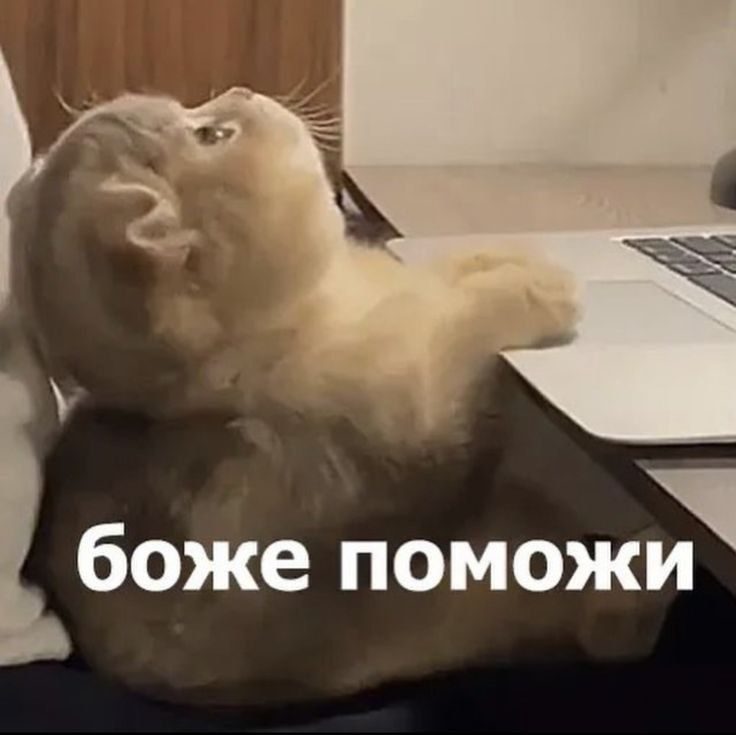